In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load image
image_path = "leaf.png"   
image = cv2.imread(image_path)
image = cv2.resize(image, (600, 400))

In [5]:

# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for green (healthy) color
lower_green = np.array([35, 40, 40])
upper_green = np.array([90, 255, 255])

# Define HSV range for yellow/brown (unhealthy) color
lower_yellow = np.array([15, 40, 40])
upper_yellow = np.array([35, 255, 255])

# Create masks
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Count pixels in each mask
green_pixels = cv2.countNonZero(mask_green)
yellow_pixels = cv2.countNonZero(mask_yellow)
total_pixels = image.shape[0] * image.shape[1]


In [6]:

# Calculate health percentage
health_percentage = (green_pixels / total_pixels) * 100
unhealthy_percentage = (yellow_pixels / total_pixels) * 100

# Combine masks for visualization
result = cv2.bitwise_and(image, image, mask=(mask_green + mask_yellow))

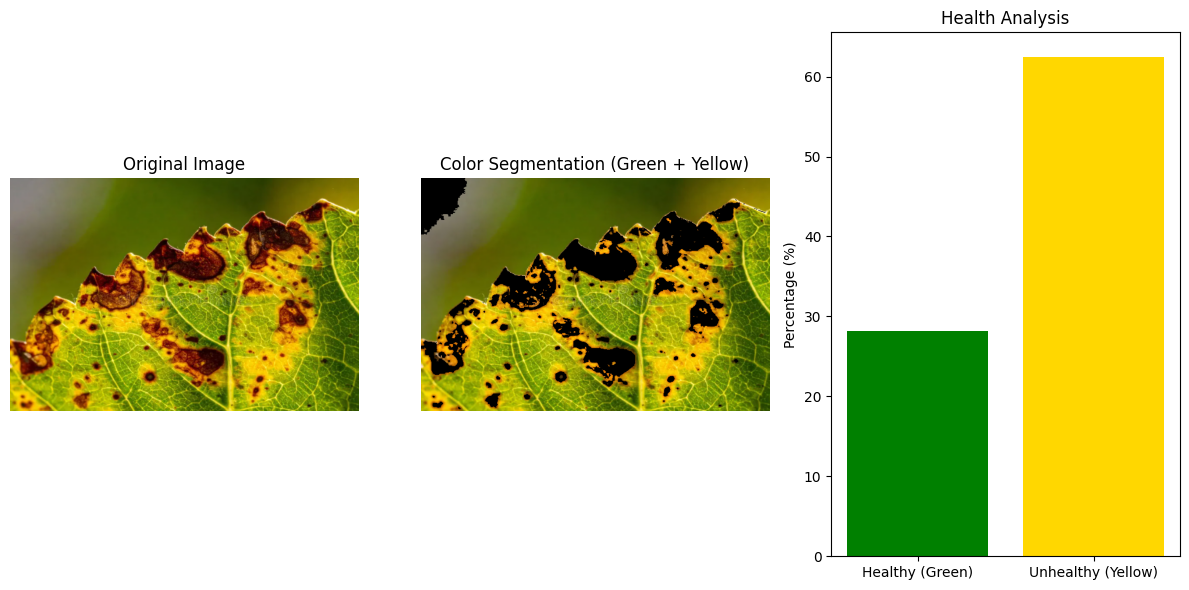

In [7]:
# Create visual display
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Color Segmentation (Green + Yellow)")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Health Analysis")
plt.bar(["Healthy (Green)", "Unhealthy (Yellow)"], [health_percentage, unhealthy_percentage], color=["green", "gold"])
plt.ylabel("Percentage (%)")

plt.tight_layout()
plt.show()


In [8]:
# Print summary
print("----- Crop Health Report -----")
print(f"Healthy Area: {health_percentage:.2f}%")
print(f"Unhealthy Area: {unhealthy_percentage:.2f}%")

if health_percentage > 70:
    print("Status: ✅ Crop is Healthy")
elif health_percentage > 40:
    print("Status: ⚠️ Moderate Health")
else:
    print("Status: ❌ Crop is Unhealthy")

----- Crop Health Report -----
Healthy Area: 28.14%
Unhealthy Area: 62.41%
Status: ❌ Crop is Unhealthy
